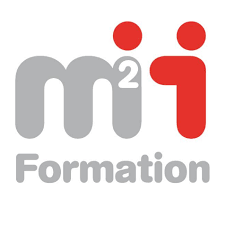

Elasticsearch est le moteur de recherche et d'analytiques de la stack Elastic.

La console Kibana a un éditeur qui est capable d'utiliser les REST API et supportant l'autocomplétion et le formatage des requêtes, elle est accessible à travers l'URL: http://localhost:5601

# Concepts de base

Les bases de données sont organisées autour des enregistrements, colonnes, tables et schémas. Elasticsearch et les autres bases de données orientées documents sont basées sur d'autres abstractions. Elasticsearch est une base de données orientée document, les documents JSON sont des éléments de premier ordre dans Elasticsearch. Ces documents JSON sont organisés selon plusieurs types et indexes, parmi les abstractions de Elasticsearch, on trouve:

* Indexes
* Types
* Documents
* Clusters
* Noeuds
* Shards et réplicats
* Mappings et types
* Indexes inversées

In [ ]:
!wget https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.10.1-linux-x86_64.tar.gz

--2020-12-13 09:41:38--  https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.10.1-linux-x86_64.tar.gz
Resolving artifacts.elastic.co (artifacts.elastic.co)... 151.101.2.222, 151.101.66.222, 151.101.130.222, ...
Connecting to artifacts.elastic.co (artifacts.elastic.co)|151.101.2.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318801277 (304M) [application/x-gzip]
Saving to: ‘elasticsearch-7.10.1-linux-x86_64.tar.gz’

elasticsearch-7.10. 100%[===================>] 304.03M   186MB/s    in 1.6s    

2020-12-13 09:41:40 (186 MB/s) - ‘elasticsearch-7.10.1-linux-x86_64.tar.gz’ saved [318801277/318801277]



**Installation**

In [ ]:
!tar -xzf elasticsearch-7.10.1-linux-x86_64.tar.gz

In [ ]:
!rm elasticsearch-7.10.1-linux-x86_64.tar.gz

In [ ]:
%cd elasticsearch-7.10.1/

/content/elasticsearch-7.10.1


In [ ]:
!bin/elasticsearch

```
PUT /catalog/_doc/1
{
  "sku": "SP000001",
  "title": "Elasticsearch, the definitive guide",
  "description": "Elasticsearch is a real-time, distributed search and analytics engine",
  "authors": [" Clinton Gormley", "Zachary Tong"],
  "ISBN": "978-1449358549",
  "price": "40.00"
}
```

La méthode PUT permet d'indexer le document qui représente un produit du catalogue de produits, il peut être converti en une commande `curl` et exécuté en ligne de commande:

```
curl -XPUT http://localhost:9000/catalog/_doc/1 -d '{
  "sku": "SP000001",
  "title": "Elasticsearch, the definitive guide",
  "description": "Elasticsearch is a real-time, distributed search and analytics engine",
  "authors": [" Clinton Gormley", "Zachary Tong"],
  "ISBN": "978-1449358549",
  "price": "40.00"
}'
```

La première ligne `PUT /catalog/_doc/1` est suivie du document JSON.



1.   `PUT` est la méthode http qui est utilisée pour indexer un nouveau document.
2.   `catalog` est le nom de l'indexe.
3.    `_doc` est le nom du type où le document sera indexé.
4.     1 est l'ID à affecter au document après son indexation.




**Indexes**

Une **indexe** est un conteneur qui stocke et gère les documents d'un seul type dans Elasticsearch. Une indexe peut contenir les documents d'un seul type comme indiqué dans le schéma suivant.

Une indexe est un conteneur logique d'un type. Certains paramètres de configuration sont définis au niveau de l'indexe alors que d'autres sont définis au niveau du type.

Le concept d'indexe est équivalent à un schéma des bases de données relationnelles, un type est l'équivalent d'une table.

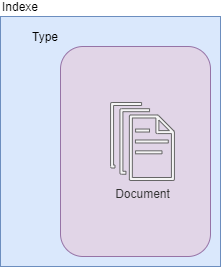

**Types**

Dans l'exemple du produit du catalogue, le document indexé est de type produit. Chaque document stocké dans le type produit représente un seul produit. Puisque la même indexe ne peut pas contenir d'autres types comme les clients, les commandes et les lignes de commande, le type permet de regrouper logiquement ou d'organiser la même famille de documents dans une indexe.

Typiquement, les documents avec des champs communs sont regroupés dans un même type. Elasticsearch ne possède pas de schéma, permettant de stocker n'importe quel document JSON avec un ensemble de champs dans un type. En pratique, il faut éviter de mélanger différentes entités comme les clients et les produits dans un même type, il est logique de les stocker dans des types différents dans des indexes séparées.

```
PUT /customers/_doc/1
{
  "firstName": "John",
  "lastName": "Smith",
  "contact": {
  "mobile": "212-xxx-yyyy"
 },
 ...
}
```

```
PUT /products/_doc/1
{
  "title": "Apple iPhone Xs (Gold, 4GB RAM, 64GB Storage, 12 MP Dual Camera, 458 PPI Display)",
  "price": 999.99,
  ...
}
```

**Documents**

Les documents JSON sont des entités de premier ordre dans Elasticsearch. Un document est composé de plusieurs champs et est l'unité basique de stockage des informations dans Elasticsearch. Par exemple, on peut stocker un seul produit, un seul client, une seule ligne de commande...

Comme indiqué dans le schéma précédent, qui montre la relation entre les indexes, les types et les documents, ces derniers sont contenus dans des indexes et des types.

Les documents contiennent plusieurs champs, chacun d'un type particulier, dans l'exemple précédent, les champs étaient `sku`, `title`, `description` et `price`. Chaque champs et sa valeur peuvent être perçus comme des clés et des valeurs dans le document.

**Noeuds**

Elasticsearch est un système distribué, il consiste en plusieurs processus exécutés à travers plusieurs machines dans un réseau et qui communiquent avec d'autres processus.

Un noeud Elasticsearch est un seul serveur et qui peut faire partie d'un cluster de noeuds. Il participe dans l'indexation, la recherche et l'exécution d'autres opérations supportées par Elasticsearch. Chaque noeud Elasticsearch a un ID unique et un nom quand il est démarré. On peut également affecter un nom statique à un noeud à travers le paramètre node,name dans le fichier de configuration YAML config/elasticsearch.yml où on peut changer également les valeurs par défaut d'autres paramètres comme le nom du noeud, le port et le nom du cluster. 

Au niveau inférieur, un noeud correspond à une seule instance du processus Elasticsearch, il est responsable de la gestion de sa part de données.

**Shards et Replicats**

Une indexe contient les documents d'un ou plusieurs types, les shards aident dans la distribution d'une indexe dans un cluster. Les shards contribuent dans la subdivision des documents d'une seule indexe à travers plusieurs noeuds. Il existe une limite pour le volume de données qui peuvent être stockées dans un seul noeud, cette limite est imposée par le stockage, la mémoire, et les capacités de traitement d'un noeud. Les shards contribuent à la subdivision de données d'une seule indexe dans un cluster et permettent par conséquence l'utilisation du stockage, mémoire et processeur.

Le processus de la subdivision de données est appelé **sharding**. Le sharding permet la mise en échelle et la parallélisation:
* Il aide à l'utilisation du stockage à travers plusieurs noeuds d'un cluster.
* Il aide à l'utilisation du processeur des différents noeuds d'un cluster

Par défaut, chaque indexe est configurée pour avoir 5 shards dans Elasticsearch. Lors de la création d'une indexe, il est possible de spécifier le nombre de shards à partir desquels les données vont être subdivisées pour l'indexe. Une fois l'indexe est crée, le nombre de shards ne peut pas être modifié.

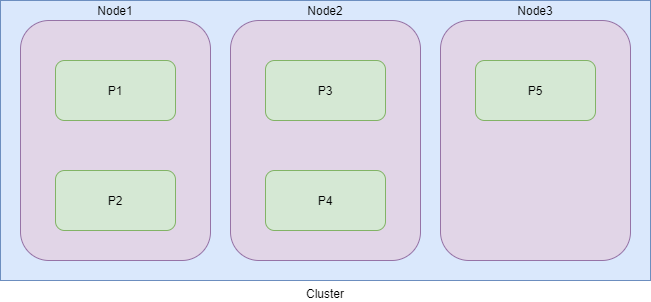

Les shards sont nommés de P1 à P5 dans le diagramme précédent, chacun contient presque 1/5 du total de données stockées dans l'indexe. Quand une requête est exécutée sur une indexe, Elasticsearch parcourt l'ensemble des shards pour consolider le résultat.

Si l'un des noeuds (Node1) s'arrête, les parts de données stockées dans les deux shards P1 et P2 sont perdues

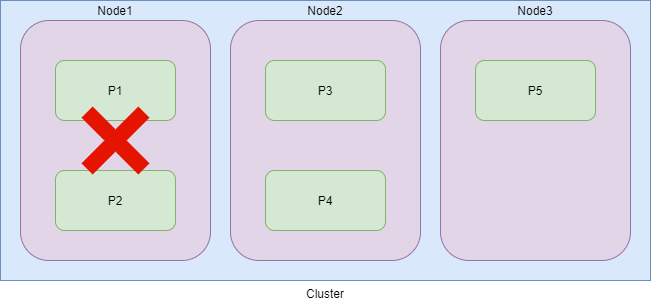

Les systèmes distribués tels que Elasticsearch sont supposés continuer à s'exécuter en dépit d'une défaillance matérielle. Ces problèmes sont contournés par les réplicats. Chaque shard dans une indexe peut être configuré pour avoir 0 ou plusieurs réplicats qui sont des copies additionnelles du shard primaire et fournissent la haute disponibilité de données.

Par exemple, avec un seul réplicat de chaque shard, on aura une copie additionnelle pour chaque shard.

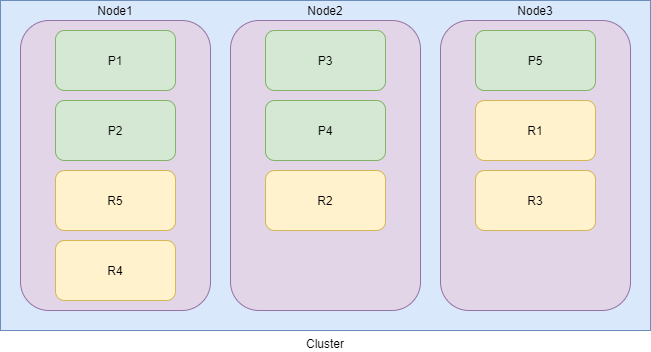

Les shards primaires sont présentés en vert et les shards réplicats en jaune. Si le noeud Node1 s'arrête, on peut retrouver tous les shards dans Node2 et Node3, les shards réplicats peuvent être promus vers des shards primaires une fois un noeud s'arrête.

A part la haute disponibilité et le failover, les shards réplicats permettent à une requête d'être exécutée à travers les réplicats. Les opérations de lecture telles que la recherche, les requêtes et les aggrégations peuvent être exécutées sur les réplicats également. Elasticsearch ditribue d'une manière transparente l'exécution des requêtes à travers les noeuds du cluster où les shards ou les réplicats sont localisés.

Pour résumer, les noeuds s'unissent pour former un cluster, ce dernier fournit une couche physique de services sur laquelle plusieurs indexes peuvent être crées. Une indexe peut contenir un ou plusieurs types où chacun peut contenir à son tours des millions voire des milliards de documents. Les indexes sont splités sur des shards qui sont des partitions des données d'une indexe. Les shards sont distribués à travers les noeuds d'un cluster. Les réplicats sont des copies des shards primaires et fournissent la haute disponibilité et le failover.

# Mapping et types de données

Elasticsearch ne défini pas des schémas, on peut stocker les données avec n'importe quel nombre et types de champs. Dans un scénario réel, les données ne sont jamais complètement unstructurées, il existe toujours un ensemble de champs qui sont communs entre plusieurs documents dans un type. Les types dans les indexes doivent être crées à bases des champs en commun. Typiquement, un seul type de document dans une indexe partage des champs en commun.

Les bases de données relationnelles imposent une structure stricte, on doit définir la structure de la table avec les noms de colonnes et les types de données pour chaque colonne au moment de la création de la table. On ne peut pas créer un nouvel enregistrement avec une nouvelle colonne ou un type de données différent lors de l'exécution.

**Types de données**

Les types de données de base sont:

* Chaînes de caractères
  - text: le type text est utile pour supporter la recherche du texte pour les champs qui contiennent une description ou des valeurs textuelles longues. Ces champs sont analysés avant l'indexation.
  - keyword: le type keyword permet de supporter les analytiques sur les champs string, ils supportent le tri, les filtres et les aggrégations

* Numériques
 - byte, short, integer et long: entiers signés avec des précisions de 8, 16, 32 et 64 bits 
 - float et double: valeurs décimales avec des précisions de 32 et 64 bits respectivement
 - half_float: valeurs décimales avec des précisions de 16 bits

 * Localisation: Permet le stockage de la longitude et de la latitude
 * Formes: Permettent de stocker les formes géométriques comme les polygones, les cartes... elles permettent d'écrire des requêtes comme la recherche de tous les éléments situés dans un certain contour.
 * IP: Permet de stocker les IPv4 et IPv6

**Mapping**

Quand le premier produit a été indexé dans Elasticsearch, ces opérations ont été effectuées:

* Création de l'indexe avec le nom `catalog`
* Définition des mappings "correspondances" pour le type de documents qui vont être stockés dans le type par défaut de l'indexe `_doc`

**Création de l'indexe**

La première étape implique la création de l'indexe puisqu'elle n'existait pas. L'indexe est crée en utilisant le nombre par défaut des shards. On peut également créer des templates pour les nouvelles indexes ce qui permet de définir les valeurs par défaut pour certain paramètres comme le nombre de shards.

**Définition des mappings**

La deuxième étape permet la définition des mappings pour le type produit. Cette étape est exécutée puisque le type produit n'existait pas.

Quand le premier document est indexé au sein d'un type qui n'existait pas, Elasticsearch essaie d'inférer les types de données pour les différents champs, c'est ce qu'on appelle le mapping dynamique des types. Afin d'afficher les mappings du type produit, il suffit d'exécuter la commande suivante:

```
GET /catalog/_mapping
```

On peut afficher les mappings pour tous les types d'une indexe ou de plusieurs indexes.

```
{
  "catalog" : {
    "mappings" : {
      "properties" : {
        "ISBN" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "author" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "description" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "os" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
                            "ignore_above" : 256
            }
          }
        },
        "price" : {
          "type" : "float"
        },
        "resolution" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "sku" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "title" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        }
      }
    }
  }
}
```

En haut de la réponse JSON, catalog est l'indexe pour laquelle on a affiché les mappings, l'élément mappings refère au type produit, les types de données pour chaque champs sont spécifiées dans l'éléments properties.

Le type de données text permet la recherche textuelle, en plus, chaque champs est stocké dans un champs composé et dans le type keyword qui permet d'effectuer le tri, les aggrégations et le filtrage.

**Indexes inversées**

L'indexe inversée est la structure de données principale de Elasticsearch, elle est similaire à l'indexe qui se trouve à la fin des livres.

Terme | Fréquence | Documents (postings list)
-- | -- | --
choice | 1 | 3
day | 1 | 2
is | 3 | 1,2,3

# Opération CRUD

Les opérations CRUD sont les opérations fondamentales de toutes les bases de données. Elles permettent d'ajouter des documents à travers l'indexation en analysant tous les champs du document et en construisant l'indexe inversée.

Il existe deux manières pour indexer un document:

* En fournissant un ID
* Sans fournir l'ID

**Avec ID**

Le format de la requête est en utilisant

```
PUT /<index>/<type>/<id>
```

```
PUT /catalog/_doc/1
{
  "sku": "SP000001",
  "title": "Hadoop the definitive guide",
  "author": "Doug Cutting",
  "ISBN": "183773738",
  "price": 45.22
}
```

**Sans ID**

Si on veut pas contrôler la génération des ID pour les documents, on peut utiliser la méthode POST. Le format de cette commande est:

```
POST /<index>/<type>
```

```
POST /catalog/_doc
{
  "sku": "SP000003", 
  "title": "Mastering Elastic",
  "description": "Mastering Elastic Stack",
  "author": "Dixit Bhaj",
  "price": 55.43
}
```

L'ID dans ce cas sera généré par Elasticsearch sous format d'une clé de hashage.

**GET**

L'API GET est utile pour retrouver un document quand on connait son ID.

```
GET /catalog/_doc/1ZFFDSS93838
```

**UPDATE**

L'API UPDATE est utilisée pour mettre à jour un document existant en utilisant son ID.

```
POST <index>/<type>/<id>/_update <body>
```

```
POST /catalog/_update/1
{
  "doc": {
    "price": 32.11
  }
}
```

Les propriétés sont spécifiées dans l'élément doc sont fusionnées dans le document existant.

**DELETE**

L'API DELETE permet de supprimer un document par ID:

```
DELETE /catalog/_doc/1Zjklzjkljezl
```

# Création d'indexes et mapping

**Création du mapping dans une indexe existante**

Dans Elasticsearch 7.0, les indexes contiennent strictement un seul type, le type par défaut est ```doc```.

Dans les version précédentes, il était possible de définir une indexe et ajouter plusieurs types par la suite. Le mapping du type peut être défini de cette manière:

```
PUT /catalog/_mapping 
{
  "properties": {
    "name": {
      "type": "text"
    }
  }
}
```

**Mise à jour du mapping**

Le mapping des nouveaux champs peut être ajouté après la création d'un type, le mapping peut être mis à jour en utilisant PUT:

```
PUT /catalog/_mapping
{
  "properties": {
    "code": {
      "type": "keyword"
    }
  }
}
```

# Vue globale de la REST API

Elasticsearch supporte un grand nombre de types d'opérations. Certaines s'appliquent sur les documents, par exemple la création, la lecture, la mise à jour, la suppression... D'autres fournissent la recherche et l'aggrégation tandis que d'autres fournissent des opérations qui s'appliquent sur le cluster comme la supervision de l'état de santé du cluster. Les APIs d'Elasticsearch peuvent être catégorisées selon les types suivants:
* Documents
* Recherche
* Aggrégation
* Indexes
* Cluster
* cat

**Conventions**

Toutes les APIs Elasticsearch partagent certaines fonctionnalités communes:
* Formatage des réponses JSON
* Traiter les indexes multiples


**Formatage des réponses JSON**

Par défaut, la réponse de toutes les requêtes n'est pas formatée, on peut passer pretty=true pour la formater.

```
curl -XGET http://localhost:9200/catalog/_doc/1?pretty=true
{
  "_index" : "catalog",
  "_type" : "product",
  "_id" : "1", 
  "_version" : 3, 
  "found" : true, 
  "_source" : {
    "sku" : "SP000001", 
    "title" : "Elasticsearch for Hadoop", ...
```

**Utiliser des indexes multiples**

Les opérations comme la recherche et l'aggrégation peuvent être effectuées sur plusieurs indexes dans la même requête. Il est possible de spécifier quelles indexes doivent être recherchées en utilisant des URLs différentes dans la requête GET.

* Rechercher tous les documents dans toutes les indexes
* Rechercher tous les documents dans une seule indexe
* Rechercher tous les documents d'un seul type dans une indexe
* Rechercher tous les documents dans des indexes multiples
* Rechercher tous les documents d'un type particulier dans toutes les indexes

La requête suivante cherche tous les documents, les documents retournés se limitent à 10, la taille par défaut.

```
GET /_search
```

* took précise le nombre de millisecondes pris par le cluster afin de retourner le résultat
* timed_out: true signifie que l'opération s'est complété avec succès sans un timeout
* _shards: Affiche le bilan du nombre de shards recherchés dans le cluster
* hits: Contient le nombre de documents qui correspondent à la requête, il contient total, le nombre total des documents qui correspondent aux critères spécifiés, max_score affiche le score maximal du document le plus pertinent et hits la liste des documents qui correspondent


**Recherche de tous les documents dans une seule indexe**

Le code suivant permet de chercher tous les documents mais seulement dans l'indexe catalog.

```
GET /catalog/_search
```

On peut également spécifier le type et l'indexe:

```
GET /catalog/_doc/_search
```

**Rechercher tous les documents dans des indexes multiples**

La commande suivante permet de chercher tous les documents dans l'indexe catalog et my_index:

```
GET /catalog,my_index/_search
```

**Rechercher tous les documents d'un type particulier dans toutes les indexes**

```
GET /_all/_doc/_search
```